# 📊 Trader Behavior vs Market Sentiment Analysis

This notebook analyzes trader behavior in relation to the Bitcoin Fear & Greed Index.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid', palette='muted')

## 1. Load Datasets

In [ ]:
# Load data
trader_df = pd.read_csv('/content/historical_data.csv')
sentiment_df = pd.read_csv('/content/fear_greed_index.csv')

# Show first few rows
print("Trader Data Sample:")
print(trader_df.head())

print("\nSentiment Data Sample:")
print(sentiment_df.head())

Trader Data Sample:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0  

In [ ]:
sentiment_df.columns

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [ ]:
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [ ]:
trader_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [ ]:
trader_df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

## 2. Clean & Preprocess Datasets

In [ ]:
# # No need to lowercase, but good practice to strip any hidden whitespace
# sentiment_df.columns = sentiment_df.columns.str.strip()

# # Select and rename columns
# sentiment_df = sentiment_df[['date', 'classification']].copy()
sentiment_df.rename(columns={'classification': 'sentiment'}, inplace=True)

# Convert to datetime
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

# Optional: Map sentiment to binary
sentiment_df['sentiment_bin'] = sentiment_df['sentiment'].map({'Fear': 0, 'Greed': 1})


# --- Trader Data ---
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], dayfirst=True)
trader_df['date'] = pd.to_datetime(trader_df['Timestamp IST'].dt.date)

# Display info
print(trader_df.info())
print(sentiment_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  datetime64[ns]
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

## 3. Merge Datasets

In [ ]:
# Merge datasets on date
merged_df = pd.merge(trader_df, sentiment_df, on='date', how='left')

# Check for missing sentiments
print("Missing sentiment values:", merged_df['sentiment'].isnull().sum())

# Drop missing sentiment rows
merged_df.dropna(subset=['sentiment'], inplace=True)

# Preview merged dataset
merged_df.head()

Missing sentiment values: 6


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,sentiment,sentiment_bin
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,NaN
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,NaN
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,NaN
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,NaN
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,NaN


## 4. Exploratory Data Analysis (EDA)

Average PnL by Sentiment:
sentiment
Extreme Fear     34.537862
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Neutral          34.307718
Name: Closed PnL, dtype: float64


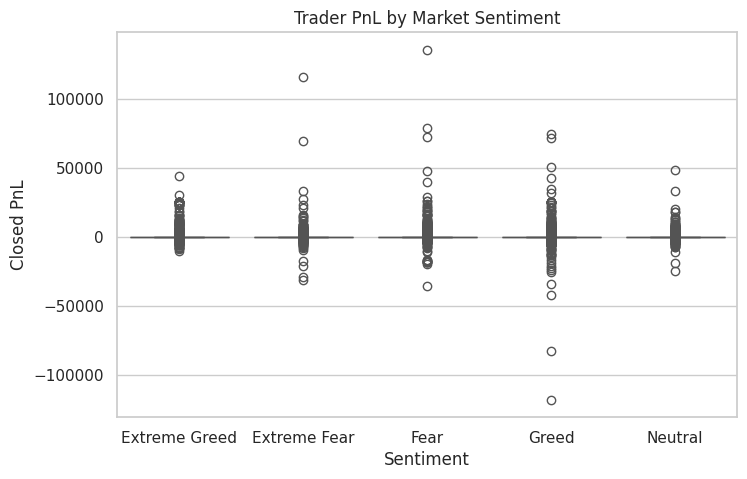

In [ ]:
# PnL by Sentiment
pnl_by_sentiment = merged_df.groupby('sentiment')['Closed PnL'].mean()
print("Average PnL by Sentiment:")
print(pnl_by_sentiment)

# Boxplot of PnL
plt.figure(figsize=(8,5))
sns.boxplot(x='sentiment', y='Closed PnL', data=merged_df)
plt.title("Trader PnL by Market Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Closed PnL")
plt.show()

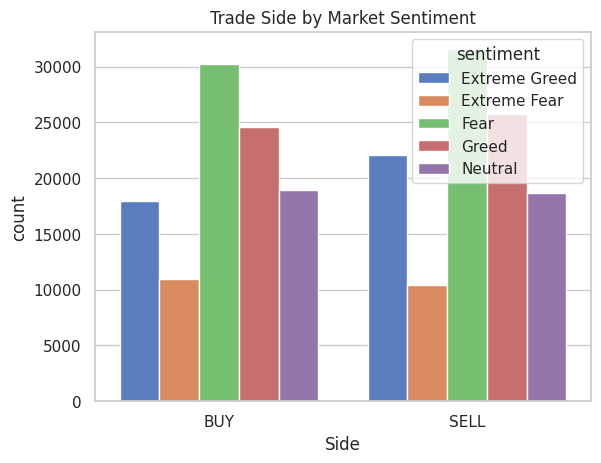

In [ ]:
# Trade Side (Long/Short) vs Sentiment
if 'Side' in merged_df.columns:
    sns.countplot(x='Side', hue='sentiment', data=merged_df)
    plt.title("Trade Side by Market Sentiment")
    plt.show()
else:
    print("No 'Side' column found in trader data.")

 # Model Evaluation & Visuals

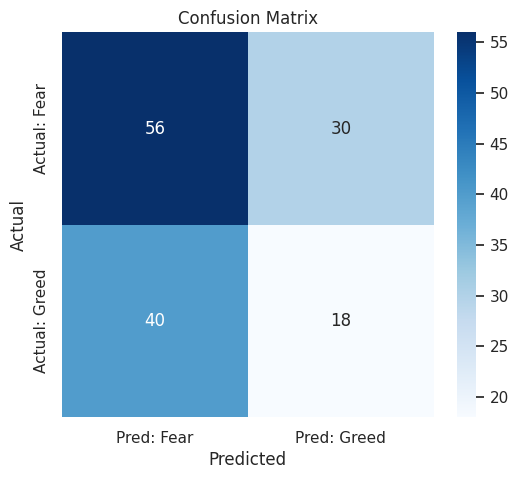

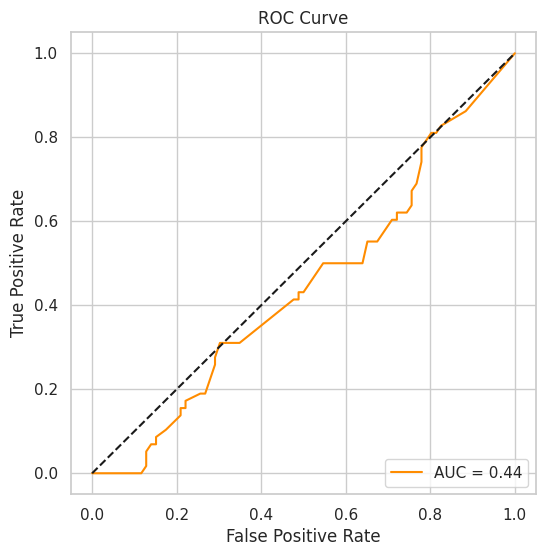

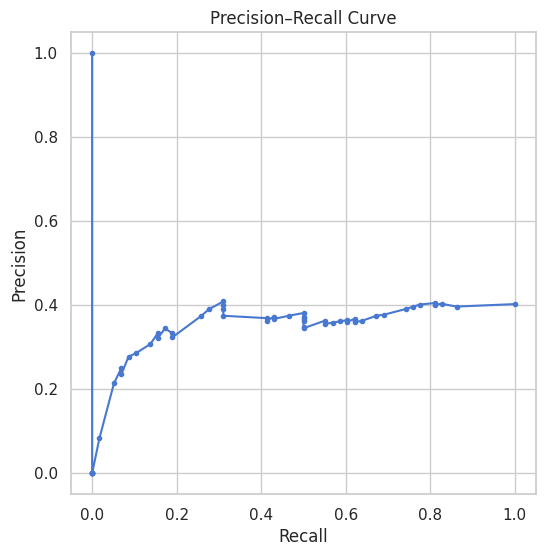

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.58      0.65      0.62        86
           1       0.38      0.31      0.34        58

    accuracy                           0.51       144
   macro avg       0.48      0.48      0.48       144
weighted avg       0.50      0.51      0.50       144

ROC‑AUC score: 0.445

Feature importances:
 pnl_mean      1.0
long_ratio    0.0
dtype: float64

Cluster by Sentiment Distribution:
sentiment  Extreme Fear  Extreme Greed  Fear  Greed  Neutral
cluster                                                     
0                    14            112    90    188       64
1                     0              1     0      1        1
2                     0              1     1      4        2


In [ ]:


from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_curve, auc, precision_recall_curve, roc_auc_score
)

# --- 1. Compute daily aggregates (without leverage)
daily = merged_df.groupby('date').agg({
    'Closed PnL': ['mean', 'std', 'count'],
    'Side': lambda x: (x == 'Long').mean()
})
daily.columns = ['pnl_mean', 'pnl_std', 'trade_count', 'long_ratio']
daily = daily.reset_index()

# --- 2. Attach sentiment labels
daily = daily.merge(
    sentiment_df[['date', 'sentiment']], on='date', how='left'
).dropna(subset=['sentiment'])

# --- 3. Cluster the behavior of days
features = daily[['pnl_mean', 'long_ratio']]
kmeans = KMeans(n_clusters=3, random_state=42).fit(features)
daily['cluster'] = kmeans.labels_

# --- 4. Prepare data for classification
X = features
y = (daily['sentiment'] == 'Greed').astype(int)

# === Here's where the split happens ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# --- 5. Train the model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# --- 6. Model evaluation
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred: Fear', 'Pred: Greed'],
            yticklabels=['Actual: Fear', 'Actual: Greed'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='darkorange')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Precision–Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(6,6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve')
plt.show()

# Final performance metrics
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print("ROC‑AUC score:", round(roc_auc_score(y_test, y_prob), 3))

# Feature Importances
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature importances:\n", importances)

# Cluster–sentiment breakdown
print("\nCluster by Sentiment Distribution:")
print(daily.groupby(['cluster', 'sentiment']).size().unstack(fill_value=0))
